### Import libraries

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
URL = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'

URL2 = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip'

In [3]:
# Read in csv
earthquake = pd.read_csv(URL)

# Create filepath for gpd data
fp = os.path.join('data', 'ne_110m_admin_0_countries','ne_110m_admin_0_countries.shp')

# Read in gpd data
countries = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [4]:
# Filter down earthquake data
# Want earthquakes with magnitude at least 6.5 in 2014

earthquake = earthquake[(earthquake['mag'] >= 6.5) & (earthquake['type'] == 'earthquake')]

earthquake.head()

,time,latitude,longitude,depth,mag,id,place,type
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake


In [5]:
# Look at what type of variable the time column is
earthquake.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [6]:
# Change time column to datetime64

earthquake['time'] = pd.to_datetime(earthquake['time'])

earthquake.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
depth               float64
mag                 float64
id                   object
place                object
type                 object
dtype: object

In [7]:
# Add a year column with just the year from the 'time' column
earthquake['year'] = earthquake['time'].dt.year

# Filter to only 2014
earthquake = earthquake[earthquake['year'] == 2014]

earthquake.head()

,time,latitude,longitude,depth,mag,id,place,type,year
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,2014
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,2014
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,2014
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake,2014
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake,2014


In [8]:
# Turn earthquake data into a GeoDataFrame

# Create a points column from latitude and longitude columns
points = gpd.points_from_xy(earthquake.longitude, 
                            earthquake.latitude)

# Turn it into a geodataframe
earthquake = gpd.GeoDataFrame(earthquake,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4326'  # Specify CRS
                                )

<Axes: >

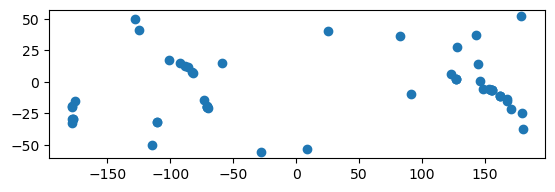

In [9]:
# Plot intitial earthquake data
earthquake.plot()

In [10]:
# Let's take a peak at our gpd data

countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

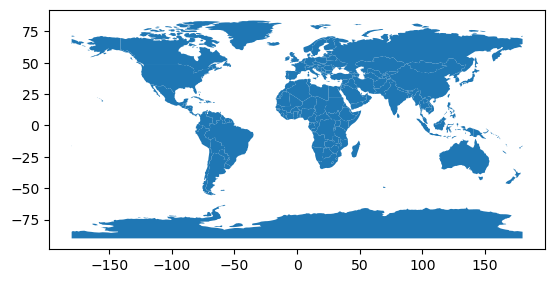

In [11]:
countries.plot()

<Axes: title={'center': 'Earthquakes of magnitude at least 6.5 in 2014'}>

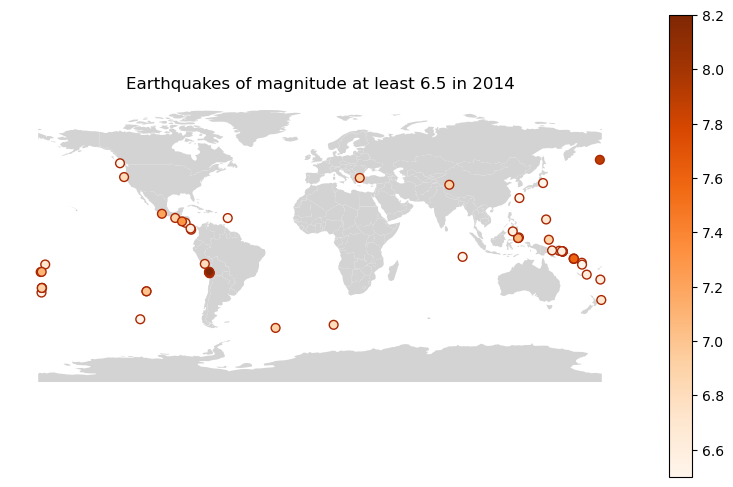

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

ax.axis('off')

ax.set_title('Earthquakes of magnitude at least 6.5 in 2014',
            fontsize = 12)

# Add countries
countries.plot(ax=ax,
               color = '#D3D3D3',
               edgecolor='none')

# Add earthquakes
earthquake.plot(ax=ax,
                column='mag',
                legend=True,
                edgecolor='#AA2704',
                markersize=40,
                cmap='Oranges')
                